In [122]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import seaborn as seabornInstance 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD, Adam,RMSprop, Adagrad
from keras.constraints import maxnorm
from sklearn.metrics import mean_squared_error
##############################################################

import pandas as pd

In [123]:
col_names=["X1", "X2", "X3", "X4","X5","Y"]
dataset = pd.read_csv('ytrived.csv',names=col_names)

In [124]:
from sklearn import preprocessing
# Get column names first
names = dataset.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(dataset)
scaled_df = pd.DataFrame(scaled_df, columns=names)

train= scaled_df[:2000]
test = scaled_df [2001:]

In [125]:
mlr = smf.ols(formula='Y ~ X1 + X2 + X3 + X4 + X5 ', data=train).fit()
mlr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1046.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:51:47   Log-Likelihood:                -1552.0
No. Observations:                2000   AIC:                             3116.
Df Residuals:                    1994   BIC:                             3150.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.012      0.044      0.965      -0.023       0.024
X1             0.6569      0.012     55.792      0.000       0.634       0.680
X2             0.1551      0.012     13.199      0.000       0.132       0.178
X3             0.1695      0.012     14.211      0.000       0.146       0.193
X4             0.2942      0.012     24.719      0.000       0.271       0.318
X5             0.3813      0.012     32.234      0.000       0.358       0.405
==============================================================================
Omnibus:                     1257.481   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15928.118
Skew:                           2.789   Prob(JB):                         0.00
Kurtosis:                      15.650   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
ypred=mlr.predict(test)

In [127]:
yactual=test['Y']

In [128]:
sse=0
for i in range (2001,2300):
    e= ypred[i]-yactual[i]
    error= e*e
    sse+= error
print(sse)

81.89506636431311


In [134]:
#The model obained after performing grid search. 
columns = ['X1', 'X2', 'X3', 'X4', 'X5']
train=scaled_df[:2000]
test=scaled_df[2001:]

columns = ['X1', 'X2', 'X3', 'X4', 'X5']
X_train = train[columns].values
y_train = train["Y"]
X_test = test[columns].values
y_test = test["Y"]

input_dim = X_train.shape[1]
print(input_dim)

def create_model(activation='relu',dropout_rate=0.01,lr = 0.01,nodes=24):
    optimizer= optimizers.Adam(lr=0.001)
    model = Sequential()
    model.add(Dense(5, input_dim=input_dim,   activation='relu'))
    
    model.add(Dense(24, activation='relu',kernel_regularizer=regularizers.l2(0.0)))
    model.add(Dropout(0.001))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error',optimizer=optimizer)
    return model


model = KerasRegressor(build_fn=create_model, batch_size=4, epochs=80)



5


In [135]:
fitt= model.fit(X_train,y_train)
ypred_nn= model.predict(X_test)

Epoch 1/80
2000/2000 [==============================] - 2s 1ms/step - loss: 0.4188
Epoch 2/80
2000/2000 [==============================] - 1s 430us/step - loss: 0.2002
Epoch 3/80
2000/2000 [==============================] - 1s 480us/step - loss: 0.1105
Epoch 4/80
2000/2000 [==============================] - 1s 355us/step - loss: 0.0645
Epoch 5/80
2000/2000 [==============================] - 1s 443us/step - loss: 0.0448
Epoch 6/80
2000/2000 [==============================] - 1s 363us/step - loss: 0.0364
Epoch 7/80
2000/2000 [==============================] - 1s 366us/step - loss: 0.0295
Epoch 8/80
2000/2000 [==============================] - 1s 362us/step - loss: 0.0250
Epoch 9/80
2000/2000 [==============================] - 1s 355us/step - loss: 0.0206
Epoch 10/80
2000/2000 [==============================] - 1s 383us/step - loss: 0.0158
Epoch 11/80
2000/2000 [==============================] - 1s 378us/step - loss: 0.0128
Epoch 12/80
2000/2000 [==============================] - 1s 361us

In [136]:
loss=fitt.history['loss']

<Figure size 432x288 with 0 Axes>

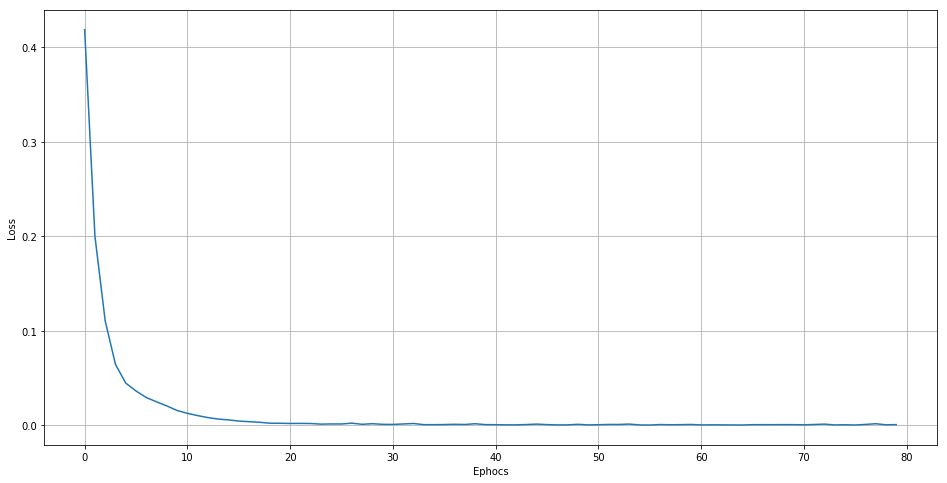

In [137]:
fig4=plt.figure()
plt.figure(figsize=(16,8))
plt.plot( loss)
plt.xlabel("Ephocs")
plt.ylabel("Loss")
plt.grid()

In [138]:
sse=0
error=0
for i in range(0,299):
    #print(ypred[i])
    #print(y_test[i+2001])
    e= ypred_nn[i]-y_test[i+2001]
    error= e*e
    sse += error
print(sse)

0.15090837631543597


In [139]:
# Grid search code, ran on the dataspace machines.
"""
Created on Sun Nov 17 20:41:09 2019

@author: Yashad
"""

from __future__ import print_function
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD, Adam,RMSprop, Adagrad
from keras.constraints import maxnorm
from sklearn.metrics import mean_squared_error
from keras import regularizers
from sklearn.model_selection import train_test_split
import pandas as pd


col_names=["X1", "X2", "X3", "X4","X5","Y"]
df = pd.read_csv('ytrived.csv',names=col_names)

columns = ['X1', 'X2', 'X3', 'X4', 'X5']
train=df[:2000]
test=df[2001:]

X_train = train[columns].values
y_train = train["Y"]
X_test = test[columns].values
y_test = test["Y"]

input_dim = X_train.shape[1]
print(input_dim)

def create_model(activation='relu',dropout_rate=0.0,lr = 0.01,nodes=5,l2_regularizer=0.0):

    init_mode='uniform'

    optimizer= optimizers.Adam(lr=lr)
    model = Sequential()
    model.add(Dense(5, input_dim=input_dim, kernel_initializer=init_mode,  
                    activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(nodes, kernel_initializer=init_mode, activation=activation,kernel_regularizer=regularizers.l2(l2_regularizer)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation='linear'))
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer)
    return model


model = KerasRegressor(build_fn=create_model, batch_size=10, epochs=10)
activation =  ['relu', 'tanh', 'sigmoid']
learn_rate = [0.001, 0.01,0.1, 0.2, 0.3]
dropout_rate = [0.001,0.01,0.1, 0.2,0.3]
nodes=[8,16,24,32]
l2_regularizer = [0.0,0.1,0.2]

epochs = [50,80] 
batch_size = [4,8, 16, 24,32,64] 
param_grid = dict(epochs=epochs, batch_size=batch_size,activation=activation,dropout_rate=dropout_rate,
                  lr=learn_rate, nodes=nodes,l2_regularizer=l2_regularizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train,verbose=0) 

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

5


C:\Users\Yashad\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 